## Introduction to Classical Natural Language Processing ##

This notebook is a hands-on introduction to Classical NLP, that is, non-deep learning techniques of NLP.  It is designed to be used with the edX course on Natural Language Processing, from Microsoft.  

The topics covered align with the NLP tasks related to the various stages of the NLP pipeline: text processing, text exploration, building features, and application level tasks.


## 1. Introduction ##


** 1.1 NLTK Setup  **
   - NLTK is included with the Anaconda Distribution of Python, or can be downloaded directly from nltk.org. 
   - Once NLTK is installed, the text data files (corpora) should be downloaded.  See the following cell to start the download.
   

In [1]:
import nltk

# uncomment the line below to download NLTK resources the first time NLTK is used and RUN this cell.
# when the "NLTK Downloader" dialog appears (takes 10-20 seconds), click on the "download" button 
#nltk.download()

** 1.2 Crash Course in Regular Expressions **

If you are new to using regular expressions, or would like a quick refresher, you can study the examples
and resulting output in the code cell below.

Here is a cheat sheet for the SEARCH BASICS (code examples follow below):

    Operator   Meaning       Example  Example meaning
    
    +          one or more   a+       look for 1 or more "a" characters 
    *          zero or more  a*       look for 0 or more "a" characters
    ?          optional      a?       look for 0 or 1 "a" characters
    []         choose 1      [abc]    look for "a" or "b" or "c"
    [-]        range         [a-z]    look for any character between "a" and "z"
    [^]        not           [^a]     look for character that is not "a"
    ()         grouping      (a-z)+   look for one of more occurences of chars between "a" and "z"
    (|)        or operator   (ey|ax)  look for strings "ey" or "ax"
    
    ab         follow        ab       look for character "a" followed by character "b"
    ^          start         ^a       look for character "a" at start of string/line
    $          end           a$       look for character "a" at end of string/line
    \s         whitespace    \sa      look for whitespace character followed by "a"
    .          any character a.b      look for "a" followed by any char followed by "b"
    
Common Uses:
   - re.search     finds first matching object
   - re.findall    returns all matching objects
   - re.sub        replaces matches with replacement string
    

In [2]:
import re

# search for single char
re.search(r"x", "this is an extra helping")

<_sre.SRE_Match object; span=(12, 13), match='x'>

In [3]:
# search for single char
re.search(r"x", "this is an extra helping").group(0)     # gives easier-to-read output

'x'

In [4]:
# find all occurences of any character between "a" and "z"
re.findall(r"[a-z]", "$34.33 cash.")

['c', 'a', 's', 'h']

In [5]:
# find all occurences of either "name:" or "phone:"
re.findall(r"(name|phone):", "My name: Joe, my phone: (312)555-1212")

['name', 'phone']

In [6]:
# find "lion", "lions" or "Lion", or "Lions"
re.findall(r"([Ll]ion)s?", "Give it to the Lions or the lion.")

['Lion', 'lion']

In [7]:
# replace allll lowercase letters with "x"
re.sub("[a-z]", "x", "Hey.  I know this regex stuff...")

'Hxx.  I xxxx xxxx xxxxx xxxxx...'

## 2. Text Processing ##

This section introduces some of the tasks and techniques used to acquire, clean, and normalize the text data.

** 2.1 Data Acquisition **

Issues:
   - how do I find the data I need?
   - is it already in digital form, or will it need OCR?
   - how much will it cost?  
   - will it be updated/expanded over time?  More costs?
   - (if CUSTOMER DATA), do I have the legal / privacy rights needed to use the data in the way I need for my application? 
   - do I have the safeguards needed to securely store the data?
  


In [8]:
import nltk

# shows how to access one of the gutenberg books included in NLTK
print("gutenberg book ids=", nltk.corpus.gutenberg.fileids())

gutenberg book ids= ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [9]:
# load words from "Alice in Wonderland"

alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print("len(alice)=", len(alice))
print(alice[:100])

len(alice)= 34110
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [10]:
# load words from "Monty Python and the Holy Grail"

grail = nltk.corpus.webtext.words("grail.txt")
print("len(grail)=", len(grail))

print(grail[:100])

len(grail)= 16967
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in']


** 2.2 Plain Text Extraction **

If your text data lives in a non-plain text file (WORD, POWERPOINT, PDF, HTML, etc.), you will need to use a “filter” to extract the plain text from the file.

Python has a number of libraries to extract plain text from popular file formats, but they are take searching and supporting code to use.  

** 2.3 Word and Sentence Segmentation (Tokenization) **

Word Segmentation Issues:
   - Some languages don’t white space characters
   - Words with hyphens or apostrophes (Who’s at the drive-in?)
   - Numbers, currency, percentages, dates, times (04/01/2018, $55,000.00)
   - Ellipses, special characters
   
Sentence Segmentation Issues:
   - Quoted speech within a sentence
   - Abbreviations with periods (The Ph.D. was D.O.A) 

Tokenization Techniques  
   - Perl script (50 lines) with RegEx         (Grefenstette, 1999)  
   - maxmatch Algorithm: 

         themanranafterit  ->    the man ran after it  
         thetabledownthere ->    theta bled own there      (Palmer, 2000)  
   

In [11]:
# code example: simple version of maxmatch algorithm for tokenization (word segmentation)
def tokenize(str, dict):
    s = 0
    words = []
    
    while (s < len(str)):
        found = False
        
        # find biggest word in dict that matches str[s:xxx]
        for word in dict:
            lw = len(word)
            if (str[s:s+lw] == word):
                words.append(word)
                s += lw
                found = True
                break
        if (not found):
            words.append(str[s])
            s += 1

    print(words)
    #return words

# small dictionary of known words, longest words first
dict = ["before", "table", "theta", "after", "where", "there", "bled", "said", "lead", "man", "her", "own", "the", "ran", "it"]

# this algorithm is designed to work with languages that don't have whitespace characters
# so simulate that in our test
tokenize("themanranafterit", dict)      # works!
tokenize("thetabledownthere", dict)     # fails!

['the', 'man', 'ran', 'after', 'it']
['theta', 'bled', 'own', 'there']


In [12]:
# NLTK example: WORD segmentation

nltk.word_tokenize("the man, he ran after it's $3.23 dog on 03/23/2016.")


['the',
 'man',
 ',',
 'he',
 'ran',
 'after',
 'it',
 "'s",
 '$',
 '3.23',
 'dog',
 'on',
 '03/23/2016',
 '.']

In [13]:
# NLTK example: SENTENCE segmentation

nltk.sent_tokenize('The man ran after it.  The table down there?  Yes, down there!')

['The man ran after it.', 'The table down there?', 'Yes, down there!']

** 2.4 Stopword Removal **

Stopwords are common words that are "not interesting" for the app/task at hand.  

Easy part – removing words that appear in list.  
Tricky part – what to use for stop words?  App-dependent.  Standard lists, high-frequency words in your text, …  

In [14]:
# code example: simple algorithm for removing stopwords
stoppers = "a is of the this".split()

def removeStopWords(stopWords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopWords])
    return newtxt

removeStopWords(stoppers, "this is a test of the stop word removal code.")

'test stop word removal code.'

In [15]:
# NLTK example: removing stopwords
from nltk.corpus import stopwords
stops = stopwords.words("english")

print("len(stops)=", len(stops))

removeStopWords(stops, "this is a test of the stop word removal code.")

len(stops)= 179


'test stop word removal code.'

** 2.5 Case Removal **

Case removal is part of a larger task called *Text Normalization*, which includes:
   - case removal
   - stemming   (covered in next section)
   
Goal of Case removal – converting all text to, for example, lower case  

In [16]:
# code example: case removal
str = 'The man ran after it.  The table down there?  Yes, down there!'
str.lower()

'the man ran after it.  the table down there?  yes, down there!'

** 2.6 Stemming **
   
Goal of Stemming:
    – stripping off endings and other pieces, called AFFIXES 
    – for English, this is prefixes and suffixes. 
    - convert word to its base word, called the LEMMA / STEM (e.g., foxes -> fox)
    
Porter Stemmer
  - 100+ cascading “rewrite” rules  
    ational  -> ate    	(e.g., relational -> relate)  
    ing	     -> <null>	(e.g., playing -> play)  
    sess     -> ss  	(e.g., grasses -> grass)  
   


In [17]:
# NLTK example: stemming

def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words
    
def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words    
    
str = "Please don't unbuckle your seat-belt while I am driving, he said"

print("porter:", stem_with_porter(str.split()))
print()
print("lancaster:", stem_with_lancaster(str.split()))


porter: ['pleas', "don't", 'unbuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving,', 'he', 'said']

lancaster: ['pleas', "don't", 'unbuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving,', 'he', 'said']


## 3. Text Exploration ##


** 3.1 Frequency Analysis **

  - Frequency Analysis
  - Letter
  - Word
  - Bigrams
  - Plots


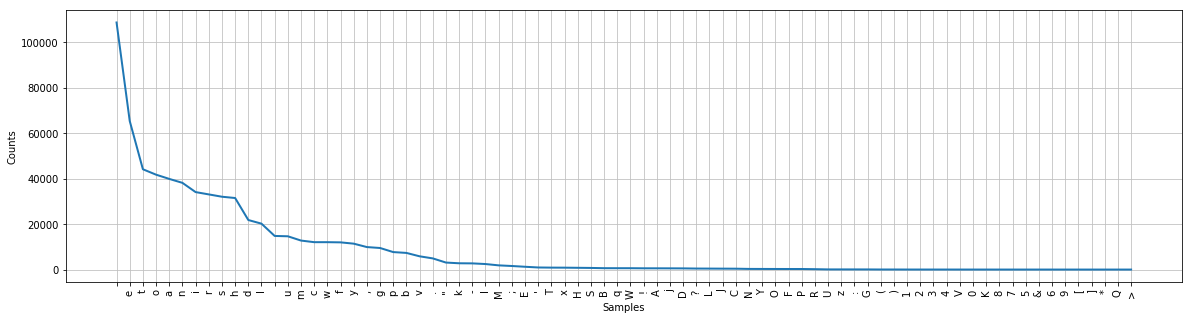

In [18]:
# NLTK example: frequence analysis
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

# get raw text from "Sense and Sensibility" by Jane Austen
raw = gutenberg.raw("austen-sense.txt")
fd_letters = FreqDist(raw)

words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)

# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5)) 

# frequency plot for letters from SAS
fd_letters.plot(100)

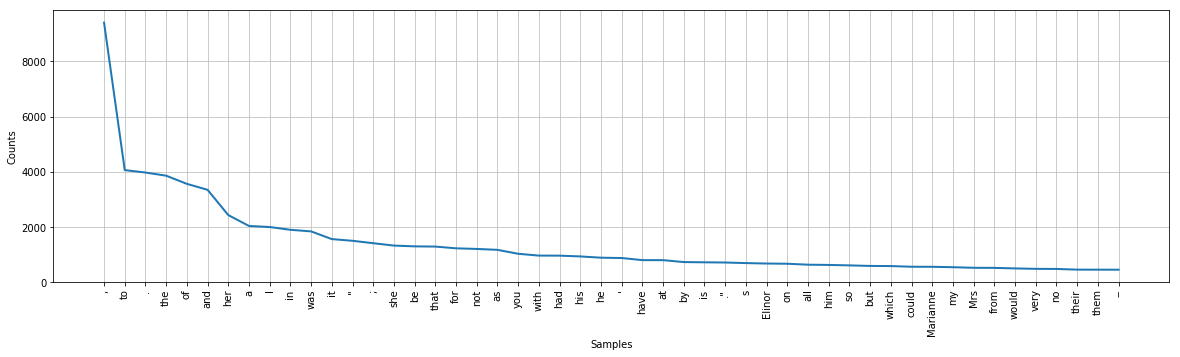

In [19]:
# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5)) 

# frequency plot for words from SAS
fd_words.plot(50)

** 3.2 Collocations **

These are interesting word pairs, usually formed by the most common bigrams.  Bigrams are collections of word pairs that occur together in the text. 

In [20]:
# let's look at collocations for our "Sense and Sensibility" text
sas.collocations() 

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


Nice!  

Now we are getting a feel for the language and subjects of the text.

** 3.3 Long words **

Sometimes looking at the long words in a text can be revealing.  Let's try it on sas.

In [21]:
# let's look at long words in the text
longWords = [w for w in set(words) if len(w) > 13]
longWords[:15]

['acknowledgments',
 'inquisitiveness',
 'irreconcilable',
 'unexhilarating',
 'accomplishment',
 'correspondence',
 'dissatisfaction',
 'irreproachable',
 'unpleasantness',
 'connoisseurship',
 'circumspection',
 'unintelligible',
 'incomprehensible',
 'inconveniences',
 'misapprehension']

** 3.3 Concordance Views **

Concordance views, also called Keywords in Context (KWIC), show the specifed word with the words that surround it in text.  These views can be helpful in understaning how the words are being used in the text.




In [22]:
# Let's try looking at some of these recent words in a Concordance view
sas.concordance("affectionately")
print()

sas.concordance("correspondence")
print()

sas.concordance("dare")
print()


Displaying 2 of 2 matches:
before . She took them all most affectionately by the hand , and expressed gre
ed , took her hand , kissed her affectionately several times , and then gave w

Displaying 4 of 4 matches:
ould not be maintained if their correspondence were to pass through Sir John '
ve been Edward ' s gift ; but a correspondence between them by letter , could 
she had no doubt , and of their correspondence she was not astonished to hear 
e of Edward afforded her by the correspondence , for his name was not even men

Displaying 25 of 36 matches:
 not know what he was talking of , I dare say ; ten to one but he was light - 
l . The assistance he thought of , I dare say , was only such as might be reas
g , if I have plenty of money , as I dare say I shall , we may think about bui
, you will make conquests enough , I dare say , one way or other . Poor Brando
e . He is the curate of the parish I dare say ." " No , THAT he is not . He is
m . He was afraid of catching cold I dare say 

** 3.4 Other Exploration Task/Views **

In [23]:
# look at words similiar to a word
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind


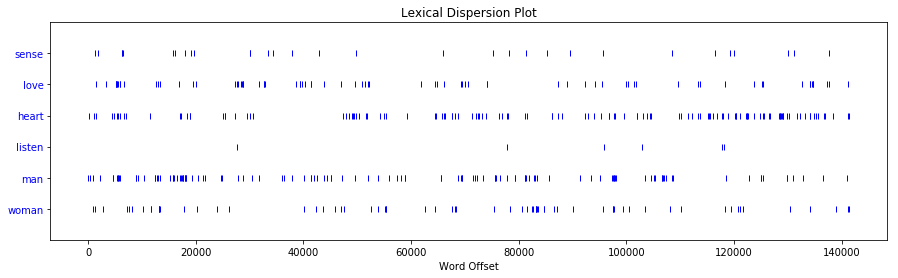

In [24]:
# these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4)) 

# look at words as they appear over time in the book/document
sas.dispersion_plot(["sense", "love", "heart", "listen", "man", "woman"])

## 4. Building Features ##

** 4.1 Bag-of-Words (BOW) **

One of the simplest features when dealing with multiple texts (like multiple documents, or multiple sentences within a document), is called Bag-of-Words.  It builds a vocabular from each word in the set of texts, and then a feature for each word, indicate the presence/absence of that word within each text. Sometimes, the count of the word is used in place of a presence flag.

A common way to represent a set of features like this is called a One-Hot vector.  For example, lets say our vocabular from our set of texts is:

    today, here, I, a, fine, sun, moon, bird, saw

The sentence we want to build a BOW for is:

    I saw a bird today.  
    
Using a 1/0 for each word in the vocabulary, our BOW encoded as a one-hot vector would be:

    1 0 1 1 0 0 1 1


** 4.2 N-Grams **

N-grams represent the sequence of N words that are found in a text.  They are commonly used as a model of the text language since they represent the frequence of words/phrases appearing in the text.  

Common types of N-grams:

unigrams   - these are the set of single words appearing in the text
bigrams    - these are the set of word pairs, like "good day" or "big deal", from the text
trigrams   - these are the set of word triples, like "really good food", from the text

To build bigrams for a text, you need to extract all possible word pairs from the text and count how many times each pair occurs.  Then, you can use the top N words (1000), or the top percent (50%) as your language model.

** 4.3 Morphological Parsing **

**Goal**: convert input word into its morphological parts.  For example:  “geese” would return goose + N + PL  


Morphological Parsing:
geese  ->  goose + N + PL  
caught ->  catch + V + PastPart  

Morphological parsing is related to stemming, but instead of mapping the word variants to a stem word, it labels  
the stem word and its affixes.

Morphological parsing, even for English, is quite involved  


** 4.4 TD/IDF **

TD/IDF stands for Term Document Inverse Document Frequency.  "Term" here can be thought of as a word.  This is a measure of the  relative importance of a word within a document, in the context of multiple documents.  

We start with the TD part - this is simply a normalized frequency of the word in the document:  

   - (word count in document) / (total words in document)  
   
The IDF is a weighting of the uniquess of the word across all of the documents.  Here is the complete formula of TD/IDF:  

   - td_idf(t,d) = wc(t,d)/wc(d) / dc(t)/dc()  

where:  
   - wc(t,d) = # of occurrences of term t in doc d  
   - wc(d) = # of words in doc d  
   - dc(t) = # of docs that contain at least 1 occurrence of term t  
   - dc() = # of docs in collection  

** 4.5 Word Sense Disambiguation (WSD) **

Related to POS tagging, WSD is use to distingish between difference senses of a word. Each sense of the word
uses the same POS tag, but means something different.  For example:

   - she served the King
   - she served the ball  
    
   - he took his money to the bank
   - he took his canoe to the bank  
     
   - I play bass guitar
   - I fish for bass  


** 4.6 Anaphora Resolution **  \

Examples:
   - Sam and Bill left with the toys.  They were later found.

Who does "they" refer to in the above sentence?  Sam and Bill, or the toys?


** 4.7 Part-of-speech (POS) Tagging **

   - Verb, noun, adjective, etc.
   - Simple tag set: 19 word classes
   
“They refuse to permit us to obtain a refuse permit”

What tagset to use?
  - Brown Corpus (87 tags)
  - C5 tagset (61 tags)
  - Penn Treebank (45 tags)
  
Types of Taggers
  - Rule-based (e.g., regular expression)
  - Lookup (Unigram)
  - N-Gram
  - Hybrid and Backoff
  - Brill Tagger (learns rules)
  - HMM Tagger
 

** HMM Tagger **

Previosly, we introduce Hidden Markov Models with a weather example.  Here, we will show an example of how we can use a HMM to create a POS tagger.


In [25]:
# before building the HMM Tagger, let's warm up with implementing our HMM weather example here

# states
start = -1; cold = 0; normal = 1; hot = 2; stateCount = 3
stateNames = ["cold", "normal", "hot"]

# outputs
hotChoc = 0; soda=1; iceCream = 2

timeSteps = 7

# state transition probabilities
trans = {}
trans[(start, cold)] = .1
trans[(start, normal)] = .8
trans[(start, hot)] = .1

trans[(cold, cold)] = .7
trans[(cold, normal)] = .1
trans[(cold, hot)] = .2

trans[(normal, cold)] = .3
trans[(normal, normal)] = .4
trans[(normal, hot)] = .3

trans[(hot, cold)] = .2
trans[(hot, normal)] = .4
trans[(hot, hot)] = .4

# state outputs
output = {}
output[(cold, hotChoc)] = .7
output[(cold, soda)] = .3
output[(cold, iceCream)] = 0

output[(normal, hotChoc)] = .1
output[(normal, soda)] = .7
output[(normal, iceCream)] = .2

output[(hot, hotChoc)] = 0
output[(hot, soda)] = .6
output[(hot, iceCream)] = .4

diary = [soda, soda, hotChoc, iceCream, soda, soda, iceCream]

# manage cell values and back pointers
cells = {}
backStates = {}

def computeMaxPrev(t, sNext):
    maxValue = 0
    maxState = 0
    
    for s in range(stateCount):
        value = cells[t, s] * trans[(s, sNext)]
        if (s == 0 or value > maxValue):
            maxValue = value
            maxState = s
            
    return (maxValue, maxState)
    
def viterbi(trans, output, diary):

    # special handling for t=0 which have no prior states)
    for s in range(stateCount):
        cells[(0, s)] = trans[(start, s)] * output[(s, diary[0])]
        
    # handle rest of time steps
    for t in range(1, timeSteps):
        for s in range(stateCount):
            maxValue, maxState = computeMaxPrev(t-1, s)
            backStates[(t,s)] = maxState
            cells[(t, s)] = maxValue * output[(s, diary[t])]
            #print("t=", t, "s=", s, "maxValue=", maxValue, "maxState=", maxState, "output=", output[(s, diary[t])], "equals=", cells[(t, s)])
        
    # walk thru cells backwards to get most probable path
    path = []
    
    for tt in range(timeSteps):
        t = timeSteps - tt - 1    # step t backwards over timesteps
        maxValue = 0
        maxState = 0
        
        for s in range(stateCount):
            value = cells[t, s] 
            if (s == 0 or value > maxValue):
                maxValue = value
                maxState = s
                
        path.insert(0, maxState)
        
    return path

# test our algorithm on the weather problem
path = viterbi(trans, output, diary)

print("Weather by days:")
for i in range(timeSteps):
    state = path[i]
    print("  day=", i+1, stateNames[state])

Weather by days:
  day= 1 normal
  day= 2 normal
  day= 3 cold
  day= 4 hot
  day= 5 normal
  day= 6 normal
  day= 7 hot


** HMM Tagger Overview**

We are going to use a Hidden Markov Model to help us assign Part-of-Speech tags (like noun, verb, adjective, etc.) to words in a sentence.  We treat the human author of the sentence as moving between different meaning states (POS tags) as they compose the sentence.  Those state are hidden from us, but we observe the words of the sentence (the output of the meaning states).

In our example here, we will use 4 POS tags from the 87 tag Brown corpus:

   - VB   (verb, base form)
   - TO   (infinitive marker)
   - NN   (common singular noun)
   - PPSS (other nominative pronoun)

We are given the state-to-state transition probabilities and the state-output probabilities (see next code cell).  We are also given the sentence to decode: "I WANT TO RACE".

In [26]:
# OK, here is our HMM POS Tagger for this example

# states
start = -1; VB = 0; TO = 1; NN = 2; PPSS = 3; stateCount = 4
stateNames = ["VB", "TO", "NN", "PPSS"]

# outputs
I = 0; WANT = 1; To = 2; RACE=3

timeSteps = 4

# state transition probabilities
trans = {}
trans[(start, VB)] = .19
trans[(start, TO)] = .0043
trans[(start, NN)] = .041
trans[(start, PPSS)] = .067

trans[(VB, VB)] = .0038
trans[(VB, TO)] = .035
trans[(VB, NN)] = .047
trans[(VB, PPSS)] = .0070

trans[(TO, VB)] = .83
trans[(TO, TO)] = 0
trans[(TO, NN)] = .00047
trans[(TO, PPSS)] = 0

trans[(NN, VB)] = .0040
trans[(NN, TO)] = .016
trans[(NN, NN)] = .087
trans[(NN, PPSS)] = .0045

trans[(PPSS, VB)] = .23
trans[(PPSS, TO)] = .00079
trans[(PPSS, NN)] = .0012
trans[(PPSS, PPSS)] = .00014

# state outputs
output = {}
output[(VB, I)] = 0
output[(VB, WANT)] = .0093
output[(VB, To)] = 0
output[(VB, RACE)] = .00012

output[(TO, I)] = 0
output[(TO, WANT)] = 0
output[(TO, To)] = .99
output[(TO, RACE)] = 0

output[(NN, I)] = 0
output[(NN, WANT)] = .000054
output[(NN, To)] = 0
output[(NN, RACE)] = .00057

output[(PPSS, I)] = .37
output[(PPSS, WANT)] = 0
output[(PPSS, To)] = 0
output[(PPSS, RACE)] = 0


sentence = [I, WANT, To, RACE]
words = ["I", "WANT", "TO", "RACE"]

# manage cell values and back pointers
cells = {}
backStates = {}

def computeMaxPrev(t, sNext):
    maxValue = 0
    maxState = 0
    
    for s in range(stateCount):
        value = cells[t, s] * trans[(s, sNext)]
        if (s == 0 or value > maxValue):
            maxValue = value
            maxState = s
            
    return (maxValue, maxState)
    
def viterbi(trans, output, sentence):

    # special handling for t=0 which have no prior states)
    for s in range(stateCount):
        cells[(0, s)] = trans[(start, s)] * output[(s, sentence[0])]
        
    # handle rest of time steps
    for t in range(1, timeSteps):
        for s in range(stateCount):
            maxValue, maxState = computeMaxPrev(t-1, s)
            backStates[(t,s)] = maxState
            cells[(t, s)] = maxValue * output[(s, sentence[t])]
            #print("t=", t, "s=", s, "maxValue=", maxValue, "maxState=", maxState, "output=", output[(s, sentence[t])], "equals=", cells[(t, s)])
        
    # walk thru cells backwards to get most probable path
    path = []
    
    for tt in range(timeSteps):
        t = timeSteps - tt - 1    # step t backwards over timesteps
        maxValue = 0
        maxState = 0
        
        for s in range(stateCount):
            value = cells[t, s] 
            if (s == 0 or value > maxValue):
                maxValue = value
                maxState = s
                
        path.insert(0, maxState)
        
    return path

# test our algorithm on the POS TAG data
path = viterbi(trans, output, sentence)

print("Tagged Sentence:")
for i in range(timeSteps):
    state = path[i]
    print("  word=", words[i], "\ttag=", stateNames[state])
    

Tagged Sentence:
  word= I 	tag= PPSS
  word= WANT 	tag= VB
  word= TO 	tag= TO
  word= RACE 	tag= VB


In [27]:
# Here is an example of using the NLTK POS tagger
import nltk

nltk.pos_tag("they refuse to permit us to obtain the refuse permit".split())

[('they', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [28]:
# POS tagging with supervised learning, using word suffix parts as features
import nltk

# start by finding the most common 1, 2, and 3 character suffixes of words (using Brown corpus of 1.1 million words)
from nltk.corpus import brown
fd = nltk.FreqDist()        # create an empty one that we will count with

for word in brown.words():
    wl = word.lower()
    fd[wl[-1:]] += 1
    fd[wl[-2:]] += 1
    fd[wl[-3:]] += 1

topSuffixes = [ key for (key,value) in fd.most_common(30)]
print(topSuffixes[:40])

def pos_features(word):
    features = {}
    
    for suffix in topSuffixes:
        features[suffix] = word.lower().endswith(suffix)
        
    return features

#pos_features("table")

tagWords = brown.tagged_words(categories="news")
data = [(pos_features(word), tag) for (word,tag) in tagWords]

print("len(data)=", len(data))

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]

dtree = nltk.DecisionTreeClassifier.train(trainData)
#dtree = nltk.NaiveBayesClassifier.train(trainData)

print("train accuracy=", nltk.classify.accuracy(dtree, trainData))
print("test accuracy=", nltk.classify.accuracy(dtree, testData))

print(dtree.classify(pos_features("cats")))
print(dtree.classify(pos_features("house")))

print(dtree.pseudocode(depth=4))


['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of', 'the', 'y', 'r', 'to', 'in', 'f', 'o', 'ed', 'nd', 'is', 'on', 'l', 'g', 'and', 'ng', 'er', 'as', 'ing', 'h', 'at']
len(data)= 100554
train accuracy= 0.48975050656986935
test accuracy= 0.48466013624384663
NNS
NN
if the == False: 
  if , == False: 
    if s == False: 
      if . == False: return '``'
      if . == True: return '.'
    if s == True: 
      if is == False: return 'NNS'
      if is == True: return 'BEZ'
  if , == True: return ','
if the == True: return 'AT'



## 5. Classical NLP Applications ##

** 5.1 Name Gender Classifier **


In [29]:
# code to build a classifier to classify names as male or female
# demonstrates the basics of feature extraction and model building

names = [(name, 'male') for name in nltk.corpus.names.words("male.txt")]
names += [(name, 'female') for name in nltk.corpus.names.words("female.txt")]

def extract_gender_features(name):
    name = name.lower()
    features = {}
    features["suffix"] = name[-1:]
    features["suffix2"] = name[-2:] if len(name) > 1 else name[0]
    features["suffix3"] = name[-3:] if len(name) > 2 else name[0]
    #features["suffix4"] = name[-4:] if len(name) > 3 else name[0]
    #features["suffix5"] = name[-5:] if len(name) > 4 else name[0]
    #features["suffix6"] = name[-6:] if len(name) > 5 else name[0]
    features["prefix"] = name[:1]
    features["prefix2"] = name[:2] if len(name) > 1 else name[0]
    features["prefix3"] = name[:3] if len(name) > 2 else name[0]
    features["prefix4"] = name[:4] if len(name) > 3 else name[0]
    features["prefix5"] = name[:5] if len(name) > 4 else name[0]
    #features["wordLen"] = len(name)
    
    #for letter in "abcdefghijklmnopqrstuvwyxz":
    #    features[letter + "-count"] = name.count(letter)
   
    return features

data = [(extract_gender_features(name), gender) for (name,gender) in names]

import random
random.shuffle(data)

#print(data[:10])
#print()
#print(data[-10:])

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes = nltk.NaiveBayesClassifier.train(trainData)

def classify(name):
    label = bayes.classify(extract_gender_features(name))
    print("name=", name, "classifed as=", label)

print("trainData accuracy=", nltk.classify.accuracy(bayes, trainData))
print("testData accuracy=", nltk.classify.accuracy(bayes, testData))

bayes.show_most_informative_features(25)

trainData accuracy= 0.9219512195121952
testData accuracy= 0.8464443045940844
Most Informative Features
                 suffix2 = 'na'           female : male   =    145.8 : 1.0
                 suffix2 = 'la'           female : male   =     66.0 : 1.0
                 suffix2 = 'ia'           female : male   =     50.2 : 1.0
                 suffix2 = 'us'             male : female =     36.9 : 1.0
                 suffix2 = 'ld'             male : female =     36.0 : 1.0
                  suffix = 'a'            female : male   =     35.7 : 1.0
                  suffix = 'k'              male : female =     27.8 : 1.0
                 suffix2 = 'sa'           female : male   =     27.1 : 1.0
                 suffix3 = 'ana'          female : male   =     23.4 : 1.0
                 suffix2 = 'ra'           female : male   =     21.7 : 1.0
                 suffix2 = 'rd'             male : female =     21.6 : 1.0
                 suffix3 = 'tta'          female : male   =     21.3 : 1

In [30]:
# print gender classifier errors so we can design new features to identify the cases
errors = []

for (name,label) in names:
    if bayes.classify(extract_gender_features(name)) != label:
        errors.append({"name": name, "label": label})

#errors


** 5.2 Sentiment Analysis **

In [31]:
# movie reviews / sentiment analysis - part #1
from nltk.corpus import movie_reviews as reviews
import random

docs = [(list(reviews.words(id)), cat)  for cat in reviews.categories() for id in reviews.fileids(cat)]
random.shuffle(docs)

#print([ (len(d[0]), d[0][:2], d[1]) for d in docs[:10]])

fd = nltk.FreqDist(word.lower() for word in reviews.words())
topKeys = [ key for (key,value) in fd.most_common(2000)]


In [32]:
# movie reviews sentiment analysis - part #2
import nltk


def review_features(doc):
    docSet = set(doc)
    features = {}
    
    for word in topKeys:
        features[word] = (word in docSet)
        
    return features

#review_features(reviews.words("pos/cv957_8737.txt"))

data = [(review_features(doc), label) for (doc,label) in docs]

dataCount = len(data)
trainCount = int(.8*dataCount)

trainData = data[:trainCount]
testData = data[trainCount:]
bayes2 = nltk.NaiveBayesClassifier.train(trainData)

print("train accuracy=", nltk.classify.accuracy(bayes2, trainData))
print("test accuracy=", nltk.classify.accuracy(bayes2, testData))

bayes2.show_most_informative_features(20)


train accuracy= 0.86875
test accuracy= 0.7625
Most Informative Features
             outstanding = True              pos : neg    =     15.1 : 1.0
                   mulan = True              pos : neg    =      8.4 : 1.0
                  seagal = True              neg : pos    =      6.9 : 1.0
             wonderfully = True              pos : neg    =      6.3 : 1.0
                 unfunny = True              neg : pos    =      5.7 : 1.0
                    lame = True              neg : pos    =      5.7 : 1.0
                   waste = True              neg : pos    =      5.6 : 1.0
                   damon = True              pos : neg    =      5.6 : 1.0
                  wasted = True              neg : pos    =      5.3 : 1.0
                   awful = True              neg : pos    =      5.0 : 1.0
                  allows = True              pos : neg    =      4.9 : 1.0
              ridiculous = True              neg : pos    =      4.8 : 1.0
                   worst = T

** 5.3 Named Entity Recognition (NER) **

Popular Named Entity Types:
  - ORGANIZATION
  - PERSON
  - LOCATION
  - GPE
  - DATE
  
Named Entity Extraction Techniques:
  - Chunking (tag pattern to group)
  - Chinking (tag pattern to omit)
  - Nested chunks (recursion)
  - Hand-crafted rules
  - Rules learned from data

In [33]:
# Named Entity Regcognition (NER) 
# processes sentences and produces (entity, relation, entity) triples!
import nltk

# first, process the document by separating the text into sentences, then words within sentences, then tag words by sentence
def preprocess(doc):
    sents = nltk.sent_tokenize(doc) 
    sents2 = [nltk.word_tokenize(sent) for sent in sents]
    sents3 = [nltk.pos_tag(sent) for sent in sents2]
    
# we are going to use a technique called CHUNKING where we label sequences of POS tags as a high level tag, like a 
# noun phrase (NP).  

# here we test our idea with a simple sentence, and a grammar for detectecting NP.  The grammar:
#  <NP>  ::= [ <DT> ] [ <JJ list> ] <NN>

tagged_sent = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),
              ("the", "DT"), ("cat", "NN")]

#np_grammar = "NP: {<DT>?<JJ>*<NN>}"
#np_grammar = "NP: {<DT>?<JJ.*>*<NN.*>*}"

np_grammar = r""" 
    NP:  
      {<DT|PP\$>?<JJ>*<NN>}
      {<NPP>+}
      """

parser = nltk.RegexpParser(np_grammar)
result = parser.parse(tagged_sent)

print(result.__repr__())


Tree('S', [Tree('NP', [('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN')]), ('barked', 'VBD'), ('at', 'IN'), Tree('NP', [('the', 'DT'), ('cat', 'NN')])])
